In [91]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import re
# from textblob import TextBlob
# from wordcloud import WordCloud
import seaborn as sns
# import matplotlib.pyplot as plt
# import cufflinks as cf
# %matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [92]:
df = pd.read_csv("Usable_data.csv")

In [93]:
df.head()

,Sno.,Comment,Overall Experience\t
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,1.0,NaN,"good,improved knowledgeof lab"
4,2.0,they did not accept one of the certificate and...,liked the team and they provide fruitful sugg...


In [94]:
data = df[df['Overall Experience\t'].notna()]

In [95]:
data.head()

,Sno.,Comment,Overall Experience\t
3,1.0,NaN,"good,improved knowledgeof lab"
4,2.0,they did not accept one of the certificate and...,liked the team and they provide fruitful sugg...
5,3.0,NaN,extraordinary knowledge regarding the paramete...
6,4.0,NaN,very good with those people
8,6.0,NaN,its fine fanastic


In [96]:
data.shape
data.columns

Index(['Sno.', 'Comment', 'Overall Experience\t'], dtype='object')

In [97]:
#create a new data frame with "id" and "comment" fields
df_subset = data[['Sno.', 'Overall Experience\t']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['Overall Experience\t'] = df_subset['Overall Experience\t'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['Overall Experience\t'] = df_subset['Overall Experience\t'].str.casefold()
print (df_subset.head(10))

    Sno.                               Overall Experience\t
3    1.0                      good improved knowledgeof lab
4    2.0   liked the team and they provide fruitful sugg...
5    3.0  extraordinary knowledge regarding the paramete...
6    4.0                        very good with those people
8    6.0                                  its fine fanastic
10   8.0  hybrid mode requires to prepare lot of the thi...
11   9.0                                                   
12  10.0  over all  experience was good all the assessor...
13  11.0                                        it was good
14  12.0                                         it was ok 


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_5068/1401701387.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['Overall Experience\t'] = df_subset['Overall Experience\t'].str.replace("[^a-zA-Z#]", " ")


In [98]:
# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['Sno.']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0  

In [99]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['Sno.']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df['Sno.'] != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...
   Sno. sentiment_type  sentiment_score
0   1.0       compound           0.7184
0   2.0       compound           0.4215
0   3.0       compound           0.4927
0   4.0       compound           0.4927
0   6.0       compound           0.2023
0   8.0       compound           0.0000
0   9.0       compound           0.0000
0  10.0       compound           0.4404
0  11.0       compound           0.4404
0  12.0       compound           0.2960


In [100]:
df_output = pd.merge(df_subset, t_df_cleaned, on='Sno.', how='inner')
print(df_output.head(10))

   Sno.                               Overall Experience\t sentiment_type  \
0   1.0                      good improved knowledgeof lab       compound   
1   2.0   liked the team and they provide fruitful sugg...       compound   
2   3.0  extraordinary knowledge regarding the paramete...       compound   
3   4.0                        very good with those people       compound   
4   6.0                                  its fine fanastic       compound   
5   8.0  hybrid mode requires to prepare lot of the thi...       compound   
6   9.0                                                          compound   
7  10.0  over all  experience was good all the assessor...       compound   
8  11.0                                        it was good       compound   
9  12.0                                         it was ok        compound   

   sentiment_score  
0           0.7184  
1           0.4215  
2           0.4927  
3           0.4927  
4           0.2023  
5           0.0000  
6    

<AxesSubplot:xlabel='sentiment_score', ylabel='Count'>

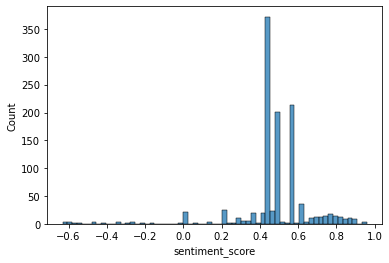

In [101]:
sns.histplot(df_output['sentiment_score'])

In [112]:
# Set a default value
df_output['Sentiment'] = '0'

df_output['Sentiment'][df_output['sentiment_score'] <= 0.0] = 'Negative'

df_output['Sentiment'][(df_output['sentiment_score'] > 0.0) & (df_output['sentiment_score'] < 0.5)] = 'Neutral'

df_output['Sentiment'][df_output['sentiment_score'] > 0.5] = 'Positive'

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_5068/3434187810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['Sentiment'][df_output['sentiment_score'] <= 0.0] = 'Negative'
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_5068/3434187810.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['Sentiment'][(df_output['sentiment_score'] > 0.0) & (df_output['sentiment_score'] < 0.5)] = 'Neutral'
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_5068/3434187810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [113]:
df_output.head(10)

,Sno.,Overall Experience\t,sentiment_type,sentiment_score,Sentiment
0,1.0,good improved knowledgeof lab,compound,0.7184,Positive
1,2.0,liked the team and they provide fruitful sugg...,compound,0.4215,Neutral
2,3.0,extraordinary knowledge regarding the paramete...,compound,0.4927,Neutral
3,4.0,very good with those people,compound,0.4927,Neutral
4,6.0,its fine fanastic,compound,0.2023,Neutral
5,8.0,hybrid mode requires to prepare lot of the thi...,compound,0.0000,Negative
6,9.0,,compound,0.0000,Negative
7,10.0,over all experience was good all the assessor...,compound,0.4404,Neutral
8,11.0,it was good,compound,0.4404,Neutral
9,12.0,it was ok,compound,0.2960,Neutral


In [114]:
print(df_output['Sentiment'].value_counts())

Neutral     691
Positive    387
Negative     48
Name: Sentiment, dtype: int64


In [115]:
df_output.loc[df_output['Sentiment'] == 'Negative']

,Sno.,Overall Experience\t,sentiment_type,sentiment_score,Sentiment
5,8.0,hybrid mode requires to prepare lot of the thi...,compound,0.0000,Negative
6,9.0,,compound,0.0000,Negative
33,39.0,excellent but only thing we found odd was tha...,compound,-0.1531,Negative
63,79.0,fine the process is very slow and nabl site d...,compound,-0.0018,Negative
71,91.0,it was good but we have a issue that nabl shou...,compound,-0.2144,Negative
108,141.0,very knowledgeable the assessors did their wo...,compound,0.0000,Negative
114,147.0,wrong number,compound,-0.4215,Negative
171,218.0,it was not pleasant at all the auditors were ...,compound,-0.5566,Negative
178,226.0,experience was satsfactory,compound,0.0000,Negative
197,247.0,assessment process was good there are two thi...,compound,-0.4588,Negative
